This table consits of all client's previous credits provided by other financial instituations that were reported to Credit Bureau (for clients who have a loan in our sample) 



In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Load Bureau table 

In [23]:
dseb63_bureau = pd.read_csv("dseb63_bureau.csv")
dseb63_bureau

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,254629
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,254629
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,254629
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,254629
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,254629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465320,5052629,Closed,currency 1,-532,0,45.0,-227.0,NaN,0,450000.0,0.0,0.0,0.0,Consumer credit,-31,NaN,66820
1465321,5054382,Closed,currency 1,-381,0,-199.0,-199.0,0.0,0,19800.0,0.0,0.0,0.0,Consumer credit,-199,0.0,166221
1465322,5043236,Active,currency 1,-1441,0,2197.0,NaN,NaN,0,1800000.0,1076809.5,0.0,0.0,Mortgage,-2,NaN,118290
1465323,5053303,Closed,currency 1,-375,0,-41.0,-19.0,NaN,0,175054.5,NaN,NaN,0.0,Consumer credit,-4,17140.5,95296


### Features Description

dseb63_bureau có 1.4 triệu datapoints, 17 cột (features)

SK_ID_BUREAU - Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)

CREDIT_ACTIVE - Current status of a Loan (Credit Bureau) - Closed/Active (2 values)

CREDIT_CURRENCY - Recorded currency of the Credit Bureau (CB) credit 

DAYS_CREDIT - How many days before current application that client applied for Credit Bureau credit 

CREDIT_DAY_OVERDUE - Number of days past due on CB credit at the time of application for related loan in our sample  

DAYS_CREDIT_ENDDATE - Remaining duration of CB credit (in days) at the time of application in Home Credit 

DAYS_ENDDED FACT - Days since CB credit ended at the time of application in Home credit (only for closed credit) 

AMT_CREDIT_MAX_OVERDUE	- Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample) 


CNT_CREDIT_PROLONG - How many times was the Credit Bureau credit prolonged (countinues) 	

AMT_CREDIT_SUM - Current credit amount for the Credit Bureau credit = AMT_CREDIT_SUM_DEBT + AMT_CREDIT_SUM_LIMIT

AMT_CREDIT_SUM_DEBT	- Current debt on Credit Bureau credit

AMT_CREDIT_SUM_LIMIT - Current credit limit of credit card reported in Credit Bureau 

AMT_CREDIT_SUM_OVERDUE	- Current amount overdue on Credit Bureau credit

CREDIT_TYPE	- Type of Credit Bureau credit (Car, cash,...)

DAYS_CREDIT_UPDATE	- How many days before loan application did last information about the

AMT_ANNUITY	 - Annuity of the Credit Bureau credit

SK_ID_CURR - ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau

In [24]:
dseb63_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465325 entries, 0 to 1465324
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_BUREAU            1465325 non-null  int64  
 1   CREDIT_ACTIVE           1465325 non-null  object 
 2   CREDIT_CURRENCY         1465325 non-null  object 
 3   DAYS_CREDIT             1465325 non-null  int64  
 4   CREDIT_DAY_OVERDUE      1465325 non-null  int64  
 5   DAYS_CREDIT_ENDDATE     1376227 non-null  float64
 6   DAYS_ENDDATE_FACT       920652 non-null   float64
 7   AMT_CREDIT_MAX_OVERDUE  516780 non-null   float64
 8   CNT_CREDIT_PROLONG      1465325 non-null  int64  
 9   AMT_CREDIT_SUM          1465322 non-null  float64
 10  AMT_CREDIT_SUM_DEBT     1242231 non-null  float64
 11  AMT_CREDIT_SUM_LIMIT    975655 non-null   float64
 12  AMT_CREDIT_SUM_OVERDUE  1465325 non-null  float64
 13  CREDIT_TYPE             1465325 non-null  object 
 14  DA

### Check duplicated and null 

In [25]:
dseb63_bureau.duplicated().sum()

0

In [26]:
#check if therer is any missing values in dataset or not 
dseb63_bureau.isnull().sum()

SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE         89098
DAYS_ENDDATE_FACT          544673
AMT_CREDIT_MAX_OVERDUE     948545
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                  3
AMT_CREDIT_SUM_DEBT        223094
AMT_CREDIT_SUM_LIMIT       489670
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1130013
SK_ID_CURR                      0
dtype: int64

### Correlation chart between features with TARGET 

<Axes: >

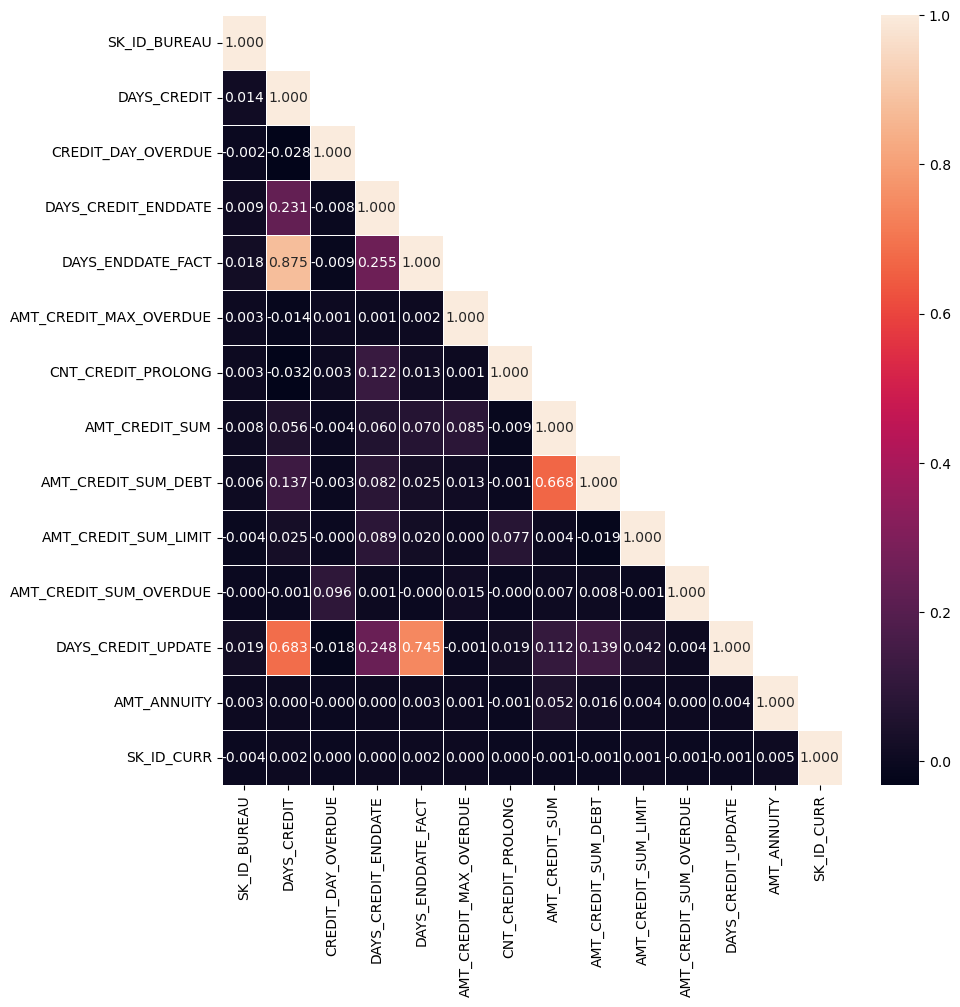

In [27]:
numeric_df = dseb63_bureau._get_numeric_data()
numeric_df_corr = numeric_df.corr()
numeric_df_corr

plt.figure(figsize=(10,10))
mask = np.zeros_like(numeric_df_corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
sns.heatmap(numeric_df_corr,mask= mask, annot= True, fmt=".3f", linewidth=.5)

### Check missing data 

In [28]:
def missing_data(dseb63_bureau):
    total = dseb63_bureau.isnull().sum().sort_values(ascending = False)
    percent = (dseb63_bureau.isnull().sum()/dseb63_bureau.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [29]:
missing_data(dseb63_bureau)

,Total,Percent
AMT_ANNUITY,1130013,77.116885
AMT_CREDIT_MAX_OVERDUE,948545,64.732738
DAYS_ENDDATE_FACT,544673,37.170798
AMT_CREDIT_SUM_LIMIT,489670,33.417160
AMT_CREDIT_SUM_DEBT,223094,15.224882
DAYS_CREDIT_ENDDATE,89098,6.080426
AMT_CREDIT_SUM,3,0.000205
SK_ID_BUREAU,0,0.000000
DAYS_CREDIT_UPDATE,0,0.000000
CREDIT_TYPE,0,0.000000


### Drop columns have percentage of missing data > 65%

In [30]:
dseb63_bureau = dseb63_bureau.drop(columns ='AMT_ANNUITY')
dseb63_bureau.shape 

(1465325, 16)

In [31]:
dseb63_bureau = dseb63_bureau.drop(columns=["DAYS_ENDDATE_FACT", "DAYS_CREDIT_UPDATE", "DAYS_CREDIT_ENDDATE"])
dseb63_bureau.shape

(1465325, 13)

### After droping

In [32]:
dseb63_bureau['AMT_CREDIT_SUM_DEBT']=dseb63_bureau['AMT_CREDIT_SUM_DEBT'].fillna(0)
dseb63_bureau['AMT_CREDIT_SUM']=dseb63_bureau['AMT_CREDIT_SUM'].fillna(0)

In [33]:
missing_data(dseb63_bureau)

,Total,Percent
AMT_CREDIT_MAX_OVERDUE,948545,64.732738
AMT_CREDIT_SUM_LIMIT,489670,33.417160
SK_ID_BUREAU,0,0.000000
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000
CREDIT_DAY_OVERDUE,0,0.000000
CNT_CREDIT_PROLONG,0,0.000000
AMT_CREDIT_SUM,0,0.000000
AMT_CREDIT_SUM_DEBT,0,0.000000


In [34]:
print(f'The shape of bureau.csv is: {dseb63_bureau.shape}')
print('-'*100)
print(f'Number of unique SK_ID_BUREAU in bureau.csv are: {len(dseb63_bureau.SK_ID_BUREAU.unique())}')
print(f'Number of unique SK_ID_CURR in bureau.csv are: {len(dseb63_bureau.SK_ID_CURR.unique())}')
print(f'Number of overlapping SK_ID_CURR in application_train.csv and bureau.csv are: {len(set(app_train.SK_ID_CURR.unique()).intersection(set(dseb63_bureau.SK_ID_CURR.unique())))}')
#print(f'Number of overlapping SK_ID_CURR in application_test.csv and bureau.csv are: {len(set(appl_test.SK_ID_CURR.unique()).intersection(set(dseb63_bureau.SK_ID_CURR.unique())))}')
print('-'*100)
print(f'Number of duplicate values in bureau: {dseb63_bureau.shape[0] - dseb63_bureau.duplicated().shape[0]}')
print('-'*100)
display(dseb63_bureau.head(5))

The shape of bureau.csv is: (1465325, 13)
----------------------------------------------------------------------------------------------------
Number of unique SK_ID_BUREAU in bureau.csv are: 1465325
Number of unique SK_ID_CURR in bureau.csv are: 263491
Number of overlapping SK_ID_CURR in application_train.csv and bureau.csv are: 210809
----------------------------------------------------------------------------------------------------
Number of duplicate values in bureau: 0
----------------------------------------------------------------------------------------------------


,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,SK_ID_CURR
0,5714462,Closed,currency 1,-497,0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,254629
1,5714463,Active,currency 1,-208,0,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,254629
2,5714464,Active,currency 1,-203,0,NaN,0,464323.5,0.0,NaN,0.0,Consumer credit,254629
3,5714465,Active,currency 1,-203,0,NaN,0,90000.0,0.0,NaN,0.0,Credit card,254629
4,5714466,Active,currency 1,-629,0,77674.5,0,2700000.0,0.0,NaN,0.0,Consumer credit,254629


# EDA

### 1. MERGE with TARGET columns in application_train.csv to get more insights 

In [35]:
app_train = pd.read_csv('dseb63_application_train.csv')
app_train

,Unnamed: 0,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,219374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246004,246004,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,90253
246005,246005,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9027
246006,246006,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,163598
246007,246007,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,300375


In [36]:
data_merged = pd.merge(app_train[["SK_ID_CURR", "TARGET"]], dseb63_bureau, how='left', on=['SK_ID_CURR'])
data_merged.head(10)

,SK_ID_CURR,TARGET,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE
0,278621,0,5885877.0,Closed,currency 1,-2586.0,0.0,0.0,0.0,22248.0,0.0,0.0,0.0,Consumer credit
1,278621,0,5885878.0,Closed,currency 1,-1636.0,0.0,0.0,0.0,112500.0,0.0,0.0,0.0,Credit card
2,278621,0,5885879.0,Closed,currency 1,-775.0,0.0,0.0,0.0,72652.5,0.0,0.0,0.0,Consumer credit
3,278621,0,5885880.0,Active,currency 1,-606.0,0.0,0.0,0.0,810000.0,0.0,810000.0,0.0,Credit card
4,139008,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,138348,0,5987200.0,Closed,currency 1,-1149.0,0.0,0.0,0.0,146250.0,0.0,0.0,0.0,Consumer credit
6,64140,0,6491433.0,Closed,currency 1,-1097.0,0.0,NaN,0.0,105705.0,0.0,0.0,0.0,Consumer credit
7,64140,0,6491434.0,Active,currency 1,-78.0,0.0,0.0,0.0,267606.0,240057.0,0.0,0.0,Consumer credit
8,64140,0,6491432.0,Closed,currency 1,-1097.0,0.0,NaN,0.0,95134.5,0.0,0.0,0.0,Consumer credit
9,219374,0,5576630.0,Active,currency 1,-1138.0,0.0,NaN,0.0,675000.0,348007.5,0.0,0.0,Consumer credit


In [37]:
data_merged.sort_values(by='SK_ID_CURR', ascending=True, inplace=True)
data_merged 

,SK_ID_CURR,TARGET,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE
90680,0,0,6055319.0,Active,currency 1,-63.0,0.0,NaN,0.0,85513.50,77566.5,NaN,0.0,Consumer credit
614842,1,1,6061091.0,Active,currency 1,-2348.0,0.0,11666.385,0.0,28350.00,0.0,0.0,0.0,Consumer credit
887440,2,0,5612559.0,Active,currency 1,-39.0,0.0,0.000,0.0,63855.00,58333.5,0.0,0.0,Consumer credit
887441,2,0,5612554.0,Closed,currency 1,-490.0,0.0,NaN,0.0,86445.00,0.0,NaN,0.0,Consumer credit
887442,2,0,5612555.0,Closed,currency 1,-1155.0,0.0,NaN,0.0,20656.08,0.0,NaN,0.0,Consumer credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951370,307506,0,5019421.0,Closed,currency 1,-1559.0,0.0,NaN,0.0,21654.00,0.0,0.0,0.0,Consumer credit
30945,307507,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1105969,307509,0,5090822.0,Closed,currency 1,-2864.0,0.0,NaN,0.0,180000.00,0.0,0.0,0.0,Consumer credit
1105968,307509,0,5009951.0,Active,currency 1,-291.0,0.0,NaN,0.0,135000.00,27900.0,0.0,0.0,Credit card


In [38]:
data_merged.shape

(1208578, 14)

## 2. Selection: Catergories 

In [39]:
def plot_categorical_variables_bar(dseb63_bureau, column_name, figsize = (18,6), percentage_display = True, plot_defaulter = True, rotation = 0, horizontal_adjust = 0, fontsize_percent = 'xx-small'):
    '''
    Function to plot Categorical Variables Bar Plots
    
    Inputs:
        data: DataFrame
            The DataFrame from which to plot
        column_name: str
            Column's name whose distribution is to be plotted
        figsize: tuple, default = (18,6)
            Size of the figure to be plotted
        percentage_display: bool, default = True
            Whether to display the percentages on top of Bars in Bar-Plot
        plot_defaulter: bool
            Whether to plot the Bar Plots for Defaulters or not
        rotation: int, default = 0
            Degree of rotation for x-tick labels
        horizontal_adjust: int, default = 0
            Horizontal adjustment parameter for percentages displayed on the top of Bars of Bar-Plot
        fontsize_percent: str, default = 'xx-small'
            Fontsize for percentage Display
        
    '''
    print(f"Total Number of unique categories of {column_name} = {len(dseb63_bureau[column_name].unique())}")
    
    plt.figure(figsize = figsize, tight_layout = False)
    sns.set(style = 'whitegrid', font_scale = 1.2)
    
    #plotting overall distribution of category
    plt.subplot(1,2,1)
    data_to_plot = dseb63_bureau[column_name].value_counts().sort_values(ascending = False)
    ax = sns.barplot(x = data_to_plot.index, y = data_to_plot, palette = 'Set1')
    
    if percentage_display:
        total_datapoints = len(dseb63_bureau[column_name].dropna())
        for p in ax.patches:
            ax.text(p.get_x() + horizontal_adjust, p.get_height() + 0.005 * total_datapoints, '{:1.02f}%'.format(p.get_height() * 100 / total_datapoints), fontsize = fontsize_percent)
        
    plt.xlabel(column_name, labelpad = 10)
    plt.title(f'Distribution of {column_name}', pad = 20)
    plt.xticks(rotation = rotation)
    plt.ylabel('Counts')
    
    #plotting distribution of category for Defaulters
    if plot_defaulter:
        percentage_defaulter_per_category = (dseb63_bureau[column_name][dseb63_bureau.TARGET == 1].value_counts() * 100 / dseb63_bureau[column_name].value_counts()).dropna().sort_values(ascending = False)

        plt.subplot(1,2,2)
        sns.barplot(x = percentage_defaulter_per_category.index, y = percentage_defaulter_per_category, palette = 'Set2')
        plt.ylabel('Percentage of Defaulter per category')
        plt.xlabel(column_name, labelpad = 10)
        plt.xticks(rotation = rotation)
        plt.title(f'Percentage of Defaulters for each category of {column_name}', pad = 20)
    plt.show()

### CREDIT_ACTIVE

Total Number of unique categories of CREDIT_ACTIVE = 5


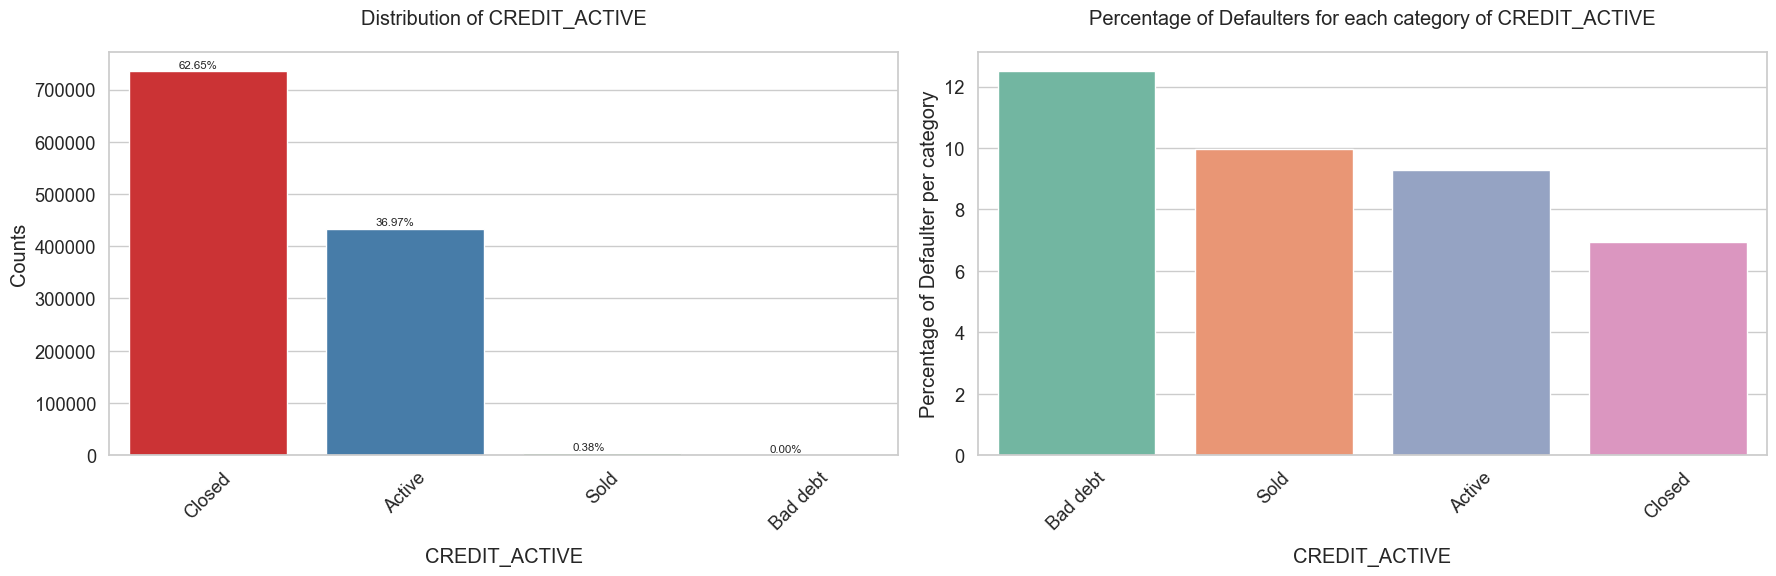

In [40]:
plot_categorical_variables_bar(data_merged,'CREDIT_ACTIVE',rotation=45, horizontal_adjust=0.25 )


Trạng thái của các khoản tín dụng Bureau là 62.65% là Closed, 36,97% là Active, được bán là 0.38% và không có nợ xấu. 

### CREDIT_CURRENCY 

Total Number of unique categories of CREDIT_CURRENCY = 5


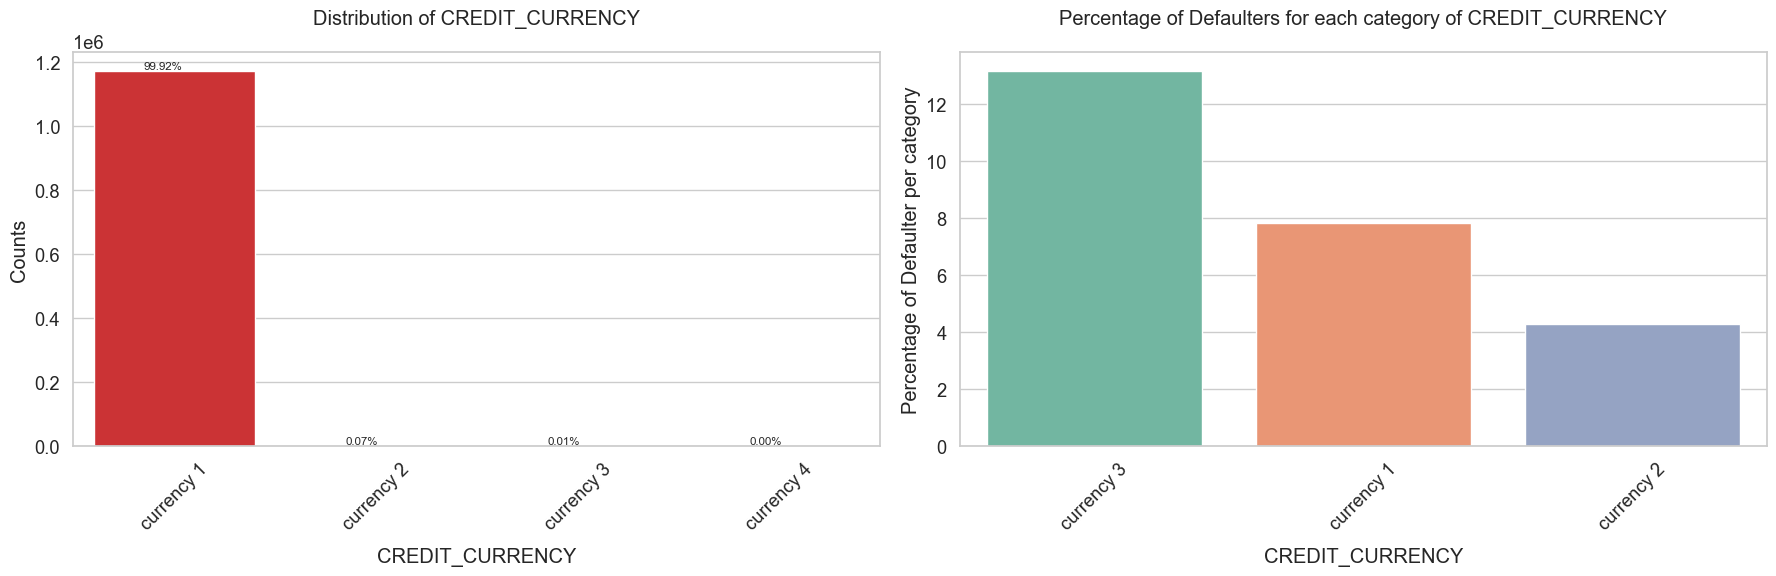

In [41]:
plot_categorical_variables_bar(data_merged,'CREDIT_CURRENCY',rotation=45, horizontal_adjust=0.25 )

Từ Curency 1 đến Currency 4 thì 99.92% là Currency 1 

### CREDIT_TYPE 

Total Number of unique categories of CREDIT_TYPE = 16


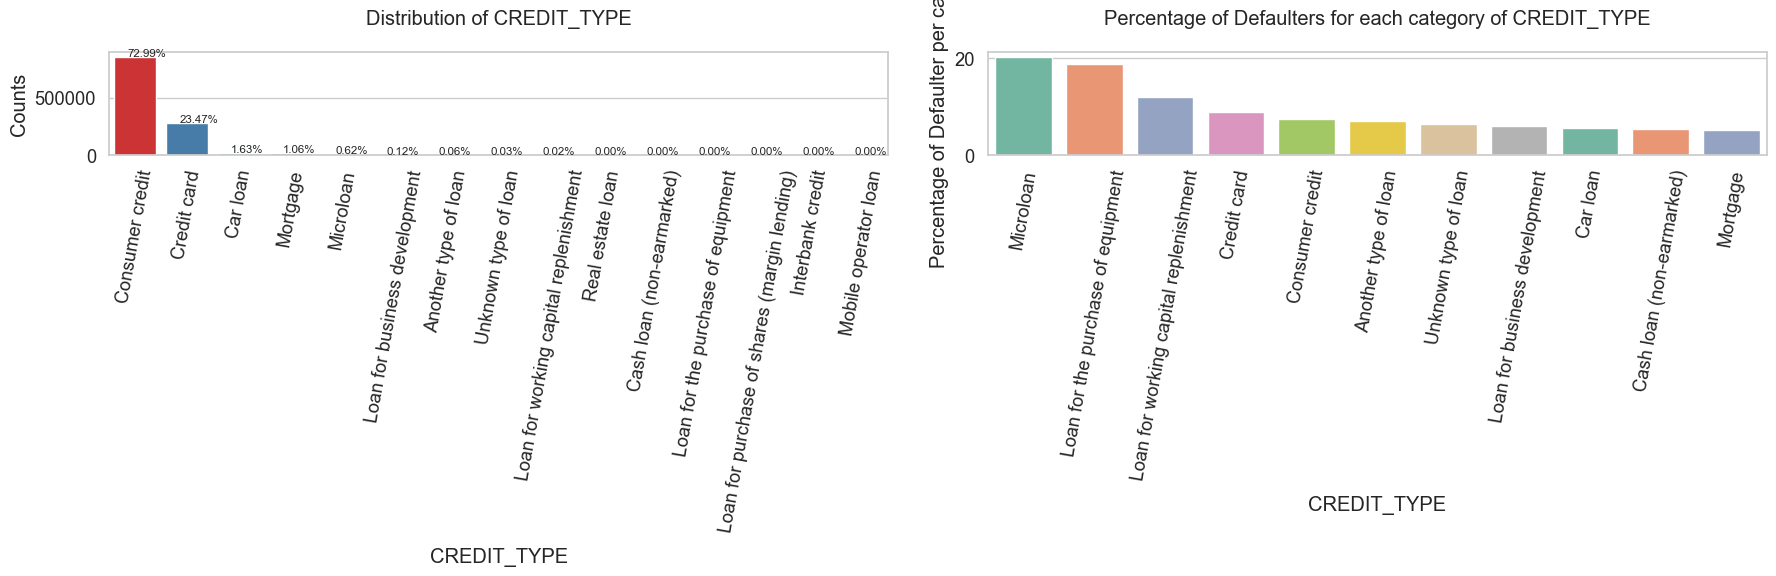

In [42]:
plot_categorical_variables_bar(data_merged,'CREDIT_TYPE',rotation=80, horizontal_adjust=0.25 )

Có tổng cộng 15 loại tín dụng, 72,99% là Consumer Credit, 23.47% là Credit Card

## SELECTION: NUMERICAL 

In [43]:
def draw_distribution_dist(x, title,c):
    fig, ax = plt.subplots(2,1,figsize=(10,5))

    sns.distplot(x,ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')

    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')

    fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()

In [44]:
def plot_continuous_variables(data, column_name, plots = ['distplot', 'countplot', 'box'], scale_limits = None, figsize = (20,8), histogram = True, log_scale = False):
    '''
    Function to plot continuous variables distribution
    
    Inputs:
        data: DataFrame
            The DataFrame from which to plot.
        column_name: str
            Column's name whose distribution is to be plotted.
        plots: list, default = ['distplot', 'CDF', box', 'violin']
            List of plots to plot for Continuous Variable.
        scale_limits: tuple (left, right), default = None
            To control the limits of values to be plotted in case of outliers.
        figsize: tuple, default = (20,8)
            Size of the figure to be plotted.
        histogram: bool, default = True
            Whether to plot histogram along with distplot or not.
        log_scale: bool, default = False
            Whether to use log-scale for variables with outlying points.
    '''
    data_to_plot = data.copy()
    if scale_limits:
        #taking only the data within the specified limits
        data_to_plot[column_name] = data[column_name][(data[column_name] > scale_limits[0]) & (data[column_name] < scale_limits[1])]

    number_of_subplots = len(plots)
    plt.figure(figsize = figsize)
    sns.set_style('whitegrid')
    
    for i, ele in enumerate(plots):
        plt.subplot(1, number_of_subplots, i + 1)
        plt.subplots_adjust(wspace=0.25)
            
        if ele == 'distplot':  
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 0].dropna(),
                         label='Non-Defaulters', hist = False, color='red')
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 1].dropna(),
                         label='Defaulters', hist = False, color='black')
            plt.xlabel(column_name)
            plt.ylabel('Probability Density')
            plt.legend(fontsize='medium')
            plt.title("Dist-Plot of {}".format(column_name))
            if log_scale:
                plt.xscale('log')
                plt.xlabel(f'{column_name} (log scale)')

        if ele == 'box':  
            sns.boxplot(x='TARGET', y=column_name, data=data_to_plot)
            plt.title("Box-Plot of {}".format(column_name))
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)')
                
        if ele == 'countplot':
            sns.countplot(data_to_plot[column_name],hue=data_to_plot['TARGET'])
#             ax.set_xticklabels(ax.get_xticklabels(), rotation= 60)
#             plt.show()

    plt.show()

### YEARS_CREDIT

In [45]:
data_merged['YEARS_CREDIT'] = abs(data_merged['DAYS_CREDIT'] / 365)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23916\1740121967.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_to_plot[column_name][data['TARGET'] == 0].dropna(),
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23916\1740121967.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

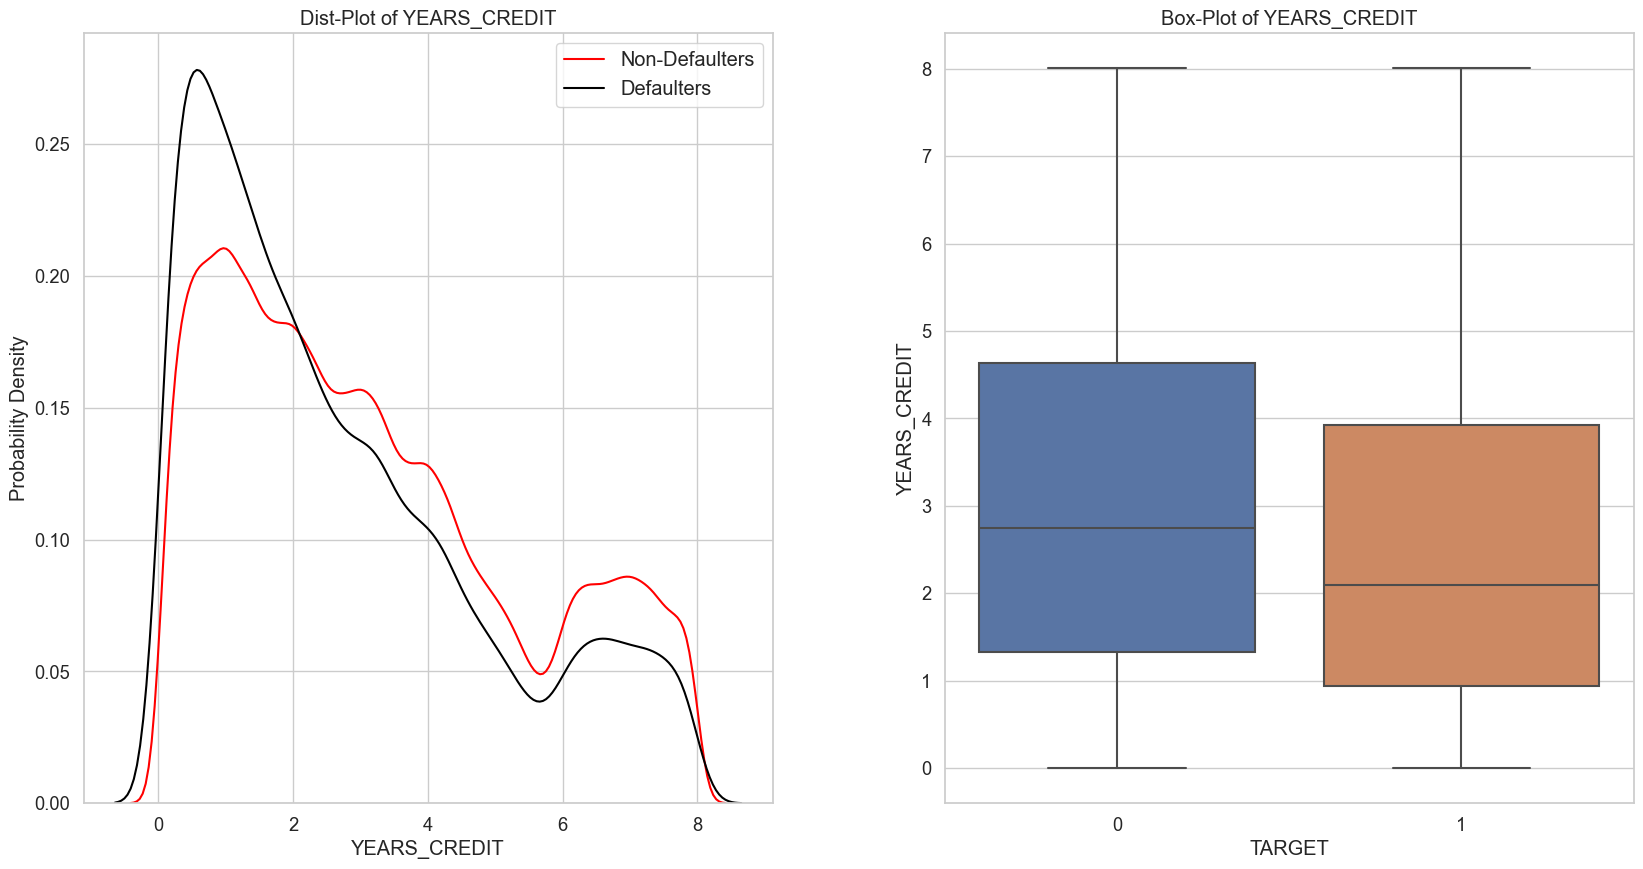

In [46]:
plot_continuous_variables(data_merged,'YEARS_CREDIT', plots = ['distplot','box'],figsize=(20,10))


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23916\653016333.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_merged['YEARS_CREDIT'], bins=10)


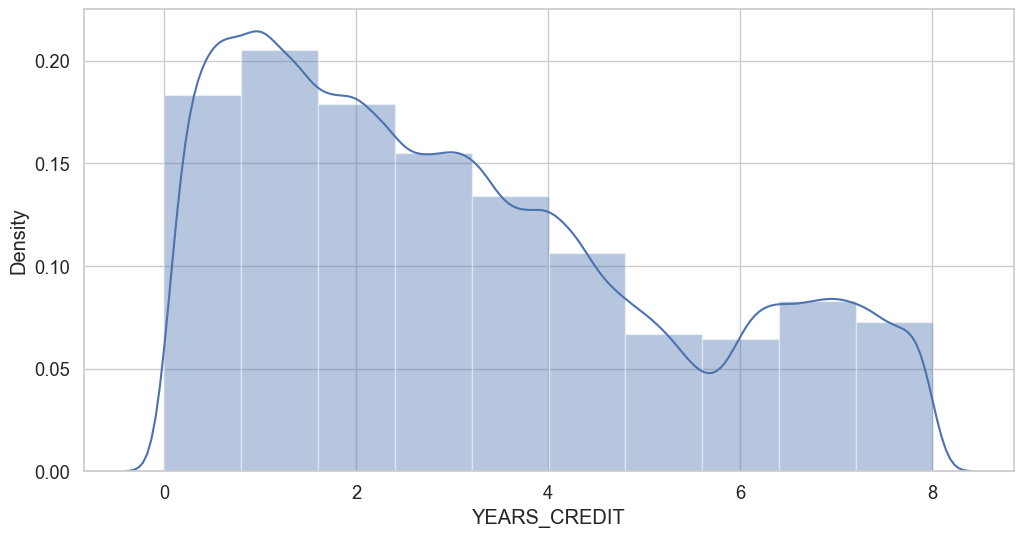

In [47]:
plt.figure(figsize= (12,6))
sns.distplot(data_merged['YEARS_CREDIT'], bins=10)
plt.show()

### Number of past loans per customer

In [48]:
num_past_loan_target = data_merged[['SK_ID_CURR', 'DAYS_CREDIT', 'TARGET']].groupby(['SK_ID_CURR', 'TARGET'])['DAYS_CREDIT'].count().reset_index()
num_past_loan_target.columns = ['SK_ID_CURR','TARGET','num_of_past_loans']
num_past_loan_target

,SK_ID_CURR,TARGET,num_of_past_loans
0,0,0,1
1,1,1,1
2,2,0,6
3,3,0,7
4,4,0,6
...,...,...,...
246004,307505,0,2
246005,307506,0,4
246006,307507,0,0
246007,307509,0,2


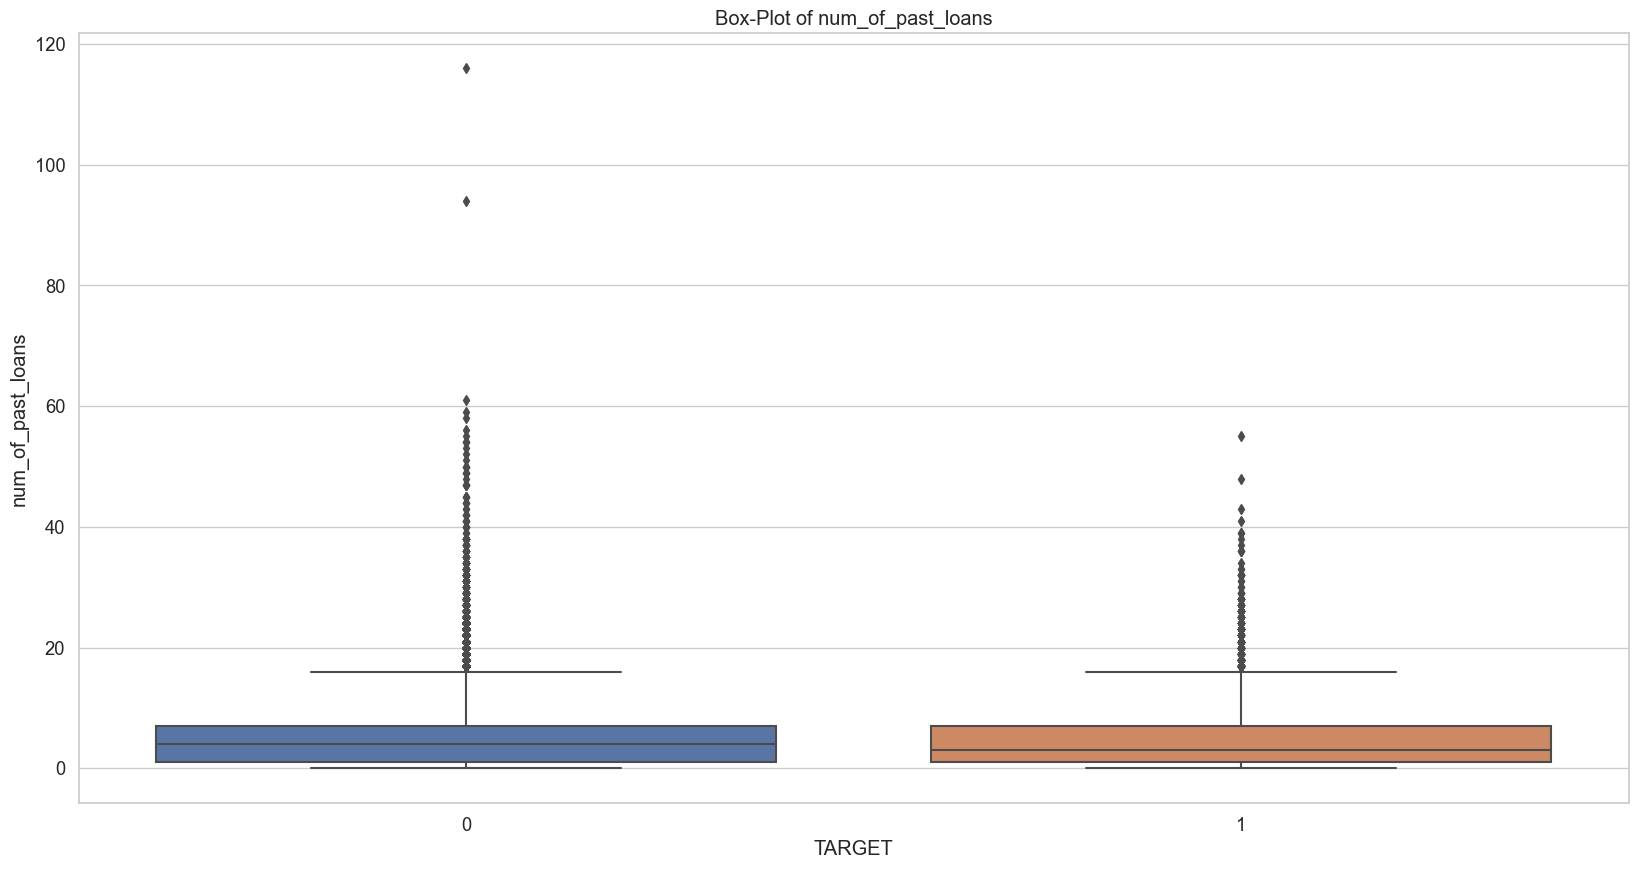

In [50]:
plot_continuous_variables(num_past_loan_target,'num_of_past_loans', plots = ['box'],figsize=(20,10))


Phân bố giống nhau -> biến này không ảnh hưởng tới TARGET 

In [51]:
num_past_loan = dseb63_bureau[['SK_ID_CURR', 'DAYS_CREDIT']].groupby('SK_ID_CURR')['DAYS_CREDIT'].count().reset_index()
num_past_loan.columns = ['SK_ID_CURR','PAST_LOAN_COUNT']
num_past_loan

,SK_ID_CURR,PAST_LOAN_COUNT
0,0,1
1,1,1
2,2,6
3,3,7
4,4,6
...,...,...
263486,307504,4
263487,307505,2
263488,307506,4
263489,307508,7


## Number of types of past loans per customers 

In [52]:
num_of_type_target = data_merged[['SK_ID_CURR','CREDIT_TYPE','TARGET']].groupby(['SK_ID_CURR','TARGET']).nunique().reset_index()
num_of_type_target.columns = ['SK_ID_CURR','TARGET','num_of_credit_type']
num_of_type_target

,SK_ID_CURR,TARGET,num_of_credit_type
0,0,0,1
1,1,1,1
2,2,0,1
3,3,0,2
4,4,0,2
...,...,...,...
246004,307505,0,2
246005,307506,0,1
246006,307507,0,0
246007,307509,0,2


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23916\1740121967.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_to_plot[column_name][data['TARGET'] == 0].dropna(),
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23916\1740121967.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

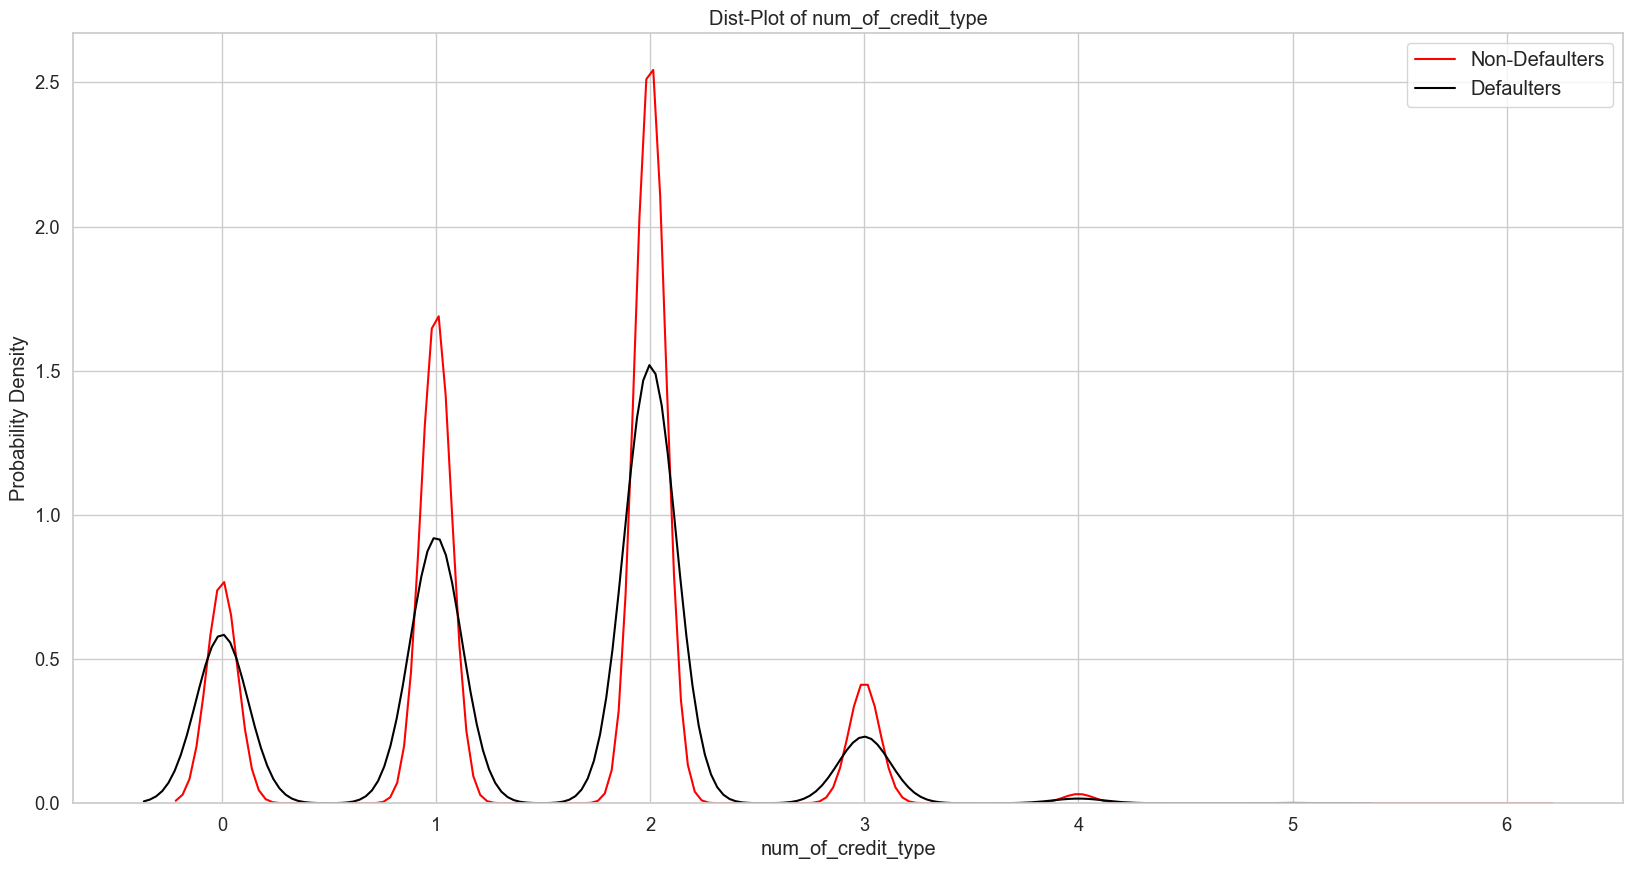

In [61]:
plot_continuous_variables(num_of_type_target,'num_of_credit_type', plots = ['distplot'],figsize=(20,10))


NUMBER OF CREDIT TYPE không ảnh hưởng tới việc khách hàng có trả nợ được không

In [54]:
num_of_type = dseb63_bureau[['SK_ID_CURR','CREDIT_TYPE']].groupby(['SK_ID_CURR']).nunique().reset_index()
num_of_type.columns = ['SK_ID_CURR','CREDIT_TYPE_COUNT']
num_of_type

,SK_ID_CURR,CREDIT_TYPE_COUNT
0,0,1
1,1,1
2,2,1
3,3,2
4,4,2
...,...,...
263486,307504,1
263487,307505,2
263488,307506,1
263489,307508,3


## The percentage of active loans per person 

In [55]:
data_merged['CREDIT_ACTIVE_BINARY'] = data_merged['CREDIT_ACTIVE']

def check(status):
    if status == 'Closed':
        result = 0
    else:
        result = 1 
    return result

data_merged['CREDIT_ACTIVE_BINARY'] = data_merged.apply(lambda x: check(x.CREDIT_ACTIVE), axis = 1)

atv_loans_target = data_merged.groupby(by = ['SK_ID_CURR', 'TARGET'])['CREDIT_ACTIVE_BINARY'].mean().reset_index().rename(index=str, columns={'CREDIT_ACTIVE_BINARY': 'ACTIVE_LOANS_PERCENTAGE'})
atv_loans_target['ACTIVE_LOANS_PERCENTAGE'] = atv_loans_target['ACTIVE_LOANS_PERCENTAGE'] * 100
atv_loans_target

,SK_ID_CURR,TARGET,ACTIVE_LOANS_PERCENTAGE
0,0,0,100.000000
1,1,1,100.000000
2,2,0,33.333333
3,3,0,42.857143
4,4,0,50.000000
...,...,...,...
246004,307505,0,100.000000
246005,307506,0,0.000000
246006,307507,0,100.000000
246007,307509,0,50.000000


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23916\1740121967.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_to_plot[column_name][data['TARGET'] == 0].dropna(),
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23916\1740121967.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

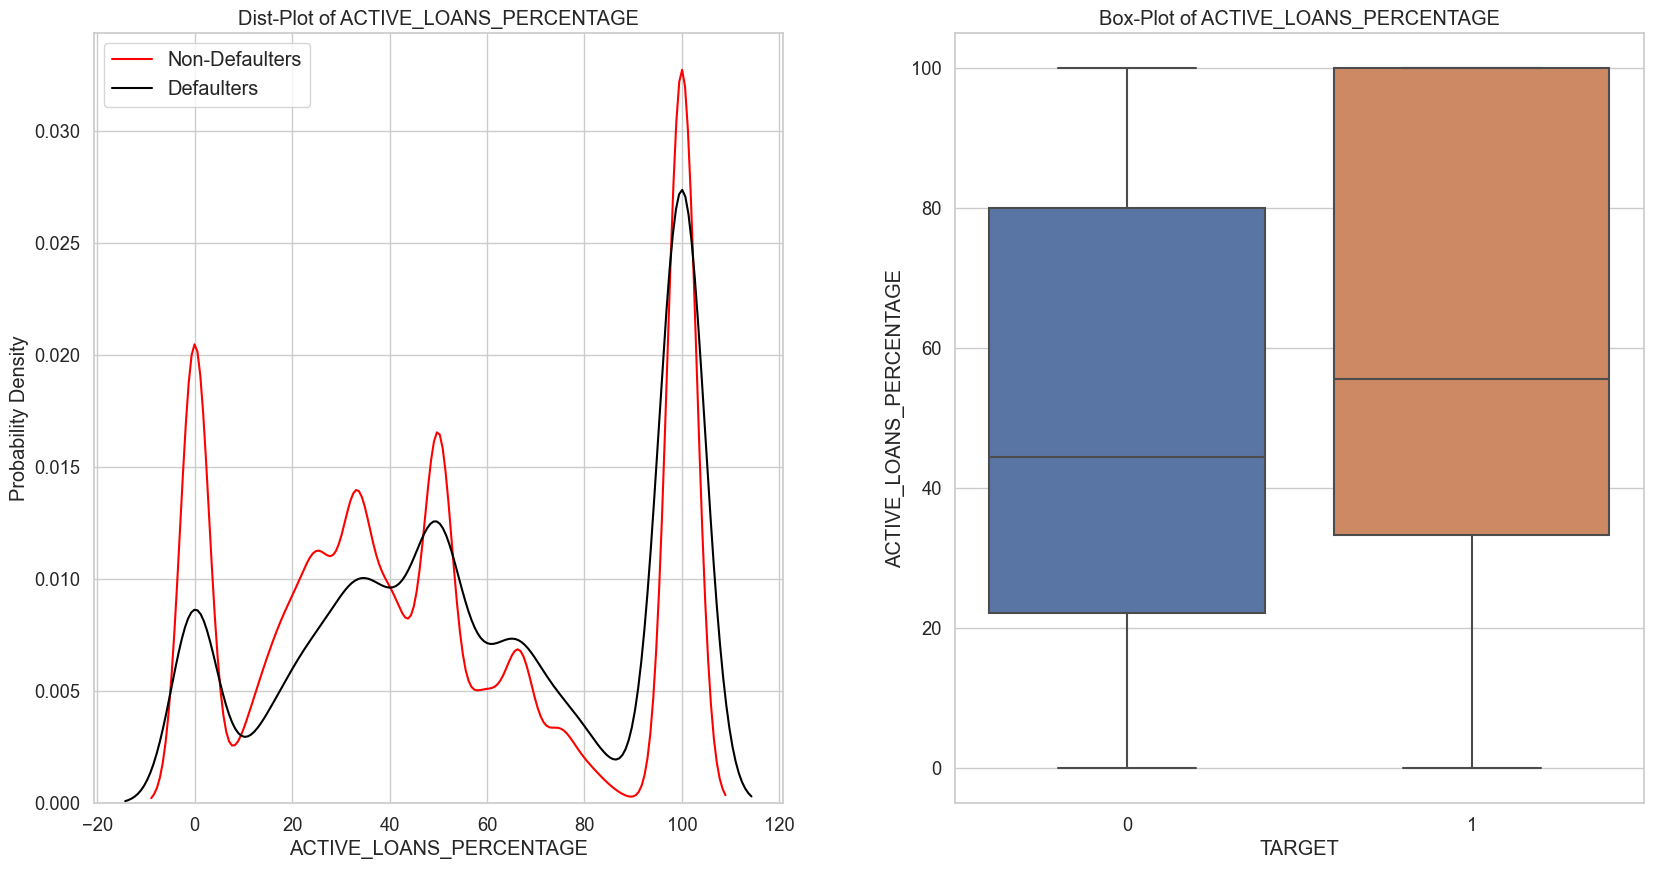

In [56]:
plot_continuous_variables(atv_loans_target,"ACTIVE_LOANS_PERCENTAGE", plots = ['distplot','box'],figsize=(20,10))

Defaulters often have a higher percentage of their active debt than non-defaulters
=> Customer with high percentage of active loan may have potential is a defaulter 

In [57]:
dseb63_bureau['CREDIT_ACTIVE_BINARY'] = dseb63_bureau['CREDIT_ACTIVE']

def check(status):
    if status == 'Closed':
        result = 0
    else:
        result = 1 
    return result

dseb63_bureau['CREDIT_ACTIVE_BINARY'] = dseb63_bureau.apply(lambda x: check(x.CREDIT_ACTIVE), axis = 1)

atv_loans = dseb63_bureau.groupby(by = ['SK_ID_CURR'])['CREDIT_ACTIVE_BINARY'].mean().reset_index().rename(index=str, columns={'CREDIT_ACTIVE_BINARY': 'ACTIVE_LOANS_PERCENTAGE'})
atv_loans['ACTIVE_LOANS_PERCENTAGE'] = atv_loans['ACTIVE_LOANS_PERCENTAGE'] * 100
dseb63_bureau = dseb63_bureau.drop(columns=['CREDIT_ACTIVE_BINARY'])
atv_loans

,SK_ID_CURR,ACTIVE_LOANS_PERCENTAGE
0,0,100.000000
1,1,100.000000
2,2,33.333333
3,3,42.857143
4,4,50.000000
...,...,...
263486,307504,25.000000
263487,307505,100.000000
263488,307506,0.000000
263489,307508,57.142857


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23916\1068585386.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(atv_loans_target["ACTIVE_LOANS_PERCENTAGE"], bins=10,hist = False)


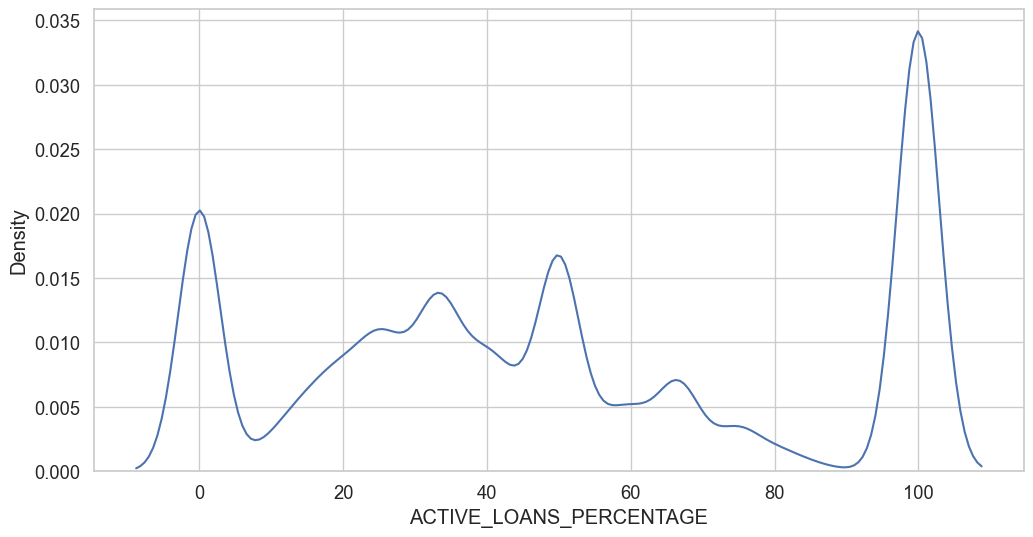

In [95]:
plt.figure(figsize= (12,6))
sns.distplot(atv_loans_target["ACTIVE_LOANS_PERCENTAGE"], bins=10,hist = False)
plt.show()

### The Ratio of Total Debt to Total Credit for each Customer 

In [62]:
data_with_sum_debt_pos_sign = data_merged[data_merged['AMT_CREDIT_SUM_DEBT']>0]

#chỉ consider những khoản debt đã đc trả hoàn toàn.
grp1 = data_with_sum_debt_pos_sign[['SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM_DEBT': 'TOTAL_CUSTOMER_DEBT'})
grp2 = data_merged[['SK_ID_CURR', 'AMT_CREDIT_SUM']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM': 'TOTAL_CUSTOMER_CREDIT'})

data_merged = data_merged.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
data_merged = data_merged.merge(grp2, on = ['SK_ID_CURR'], how = 'left')
del grp1, grp2


data_merged['DEBT_CREDIT_RATIO'] = (data_merged['TOTAL_CUSTOMER_DEBT']/data_merged['TOTAL_CUSTOMER_CREDIT'])*100
data_merged['DEBT_CREDIT_RATIO'] = data_merged['DEBT_CREDIT_RATIO'].replace([np.inf, -np.inf], np.nan)

del data_merged['TOTAL_CUSTOMER_DEBT'], data_merged['TOTAL_CUSTOMER_CREDIT']

debt_credit_target = data_merged.groupby(by = ['SK_ID_CURR','TARGET'])['DEBT_CREDIT_RATIO'].mean().reset_index().rename(index=str)
debt_credit_target

,SK_ID_CURR,TARGET,DEBT_CREDIT_RATIO
0,0,0,90.706731
1,1,1,NaN
2,2,0,37.908544
3,3,0,41.072109
4,4,0,44.445915
...,...,...,...
246004,307505,0,NaN
246005,307506,0,NaN
246006,307507,0,NaN
246007,307509,0,8.857143


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23916\1740121967.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_to_plot[column_name][data['TARGET'] == 0].dropna(),
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23916\1740121967.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

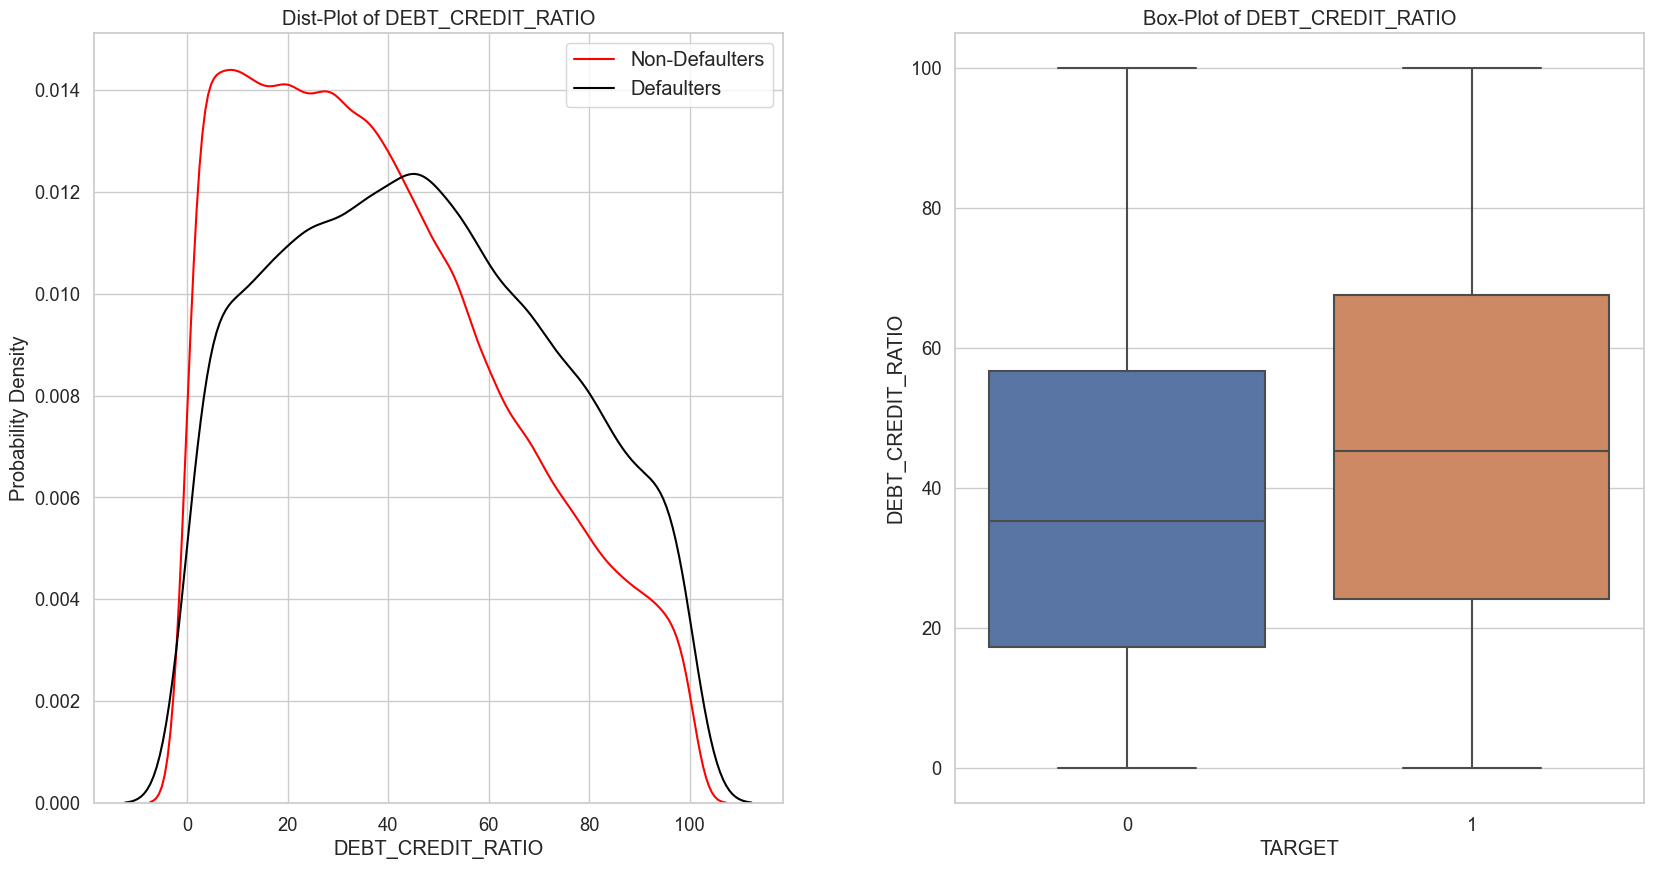

In [64]:
debt_credit_target = debt_credit_target[debt_credit_target['DEBT_CREDIT_RATIO'] <= 100]
plot_continuous_variables(debt_credit_target,"DEBT_CREDIT_RATIO", plots = ['distplot', 'box'],figsize=(20,10))


In [94]:
data_with_sum_debt_pos_sign_all = dseb63_bureau[dseb63_bureau['AMT_CREDIT_SUM_DEBT']>0]

#chỉ consider những khoản debt đã đc trả hoàn toàn.
grp1 = data_with_sum_debt_pos_sign_all[['SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM_DEBT': 'TOTAL_CUSTOMER_DEBT'})
grp2 = dseb63_bureau[['SK_ID_CURR', 'AMT_CREDIT_SUM']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM': 'TOTAL_CUSTOMER_CREDIT'})

dseb63_bureau = dseb63_bureau.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
dseb63_bureau = dseb63_bureau.merge(grp2, on = ['SK_ID_CURR'], how = 'left')
del grp1, grp2


dseb63_bureau['DEBT_CREDIT_RATIO'] = (dseb63_bureau['TOTAL_CUSTOMER_DEBT']/dseb63_bureau['TOTAL_CUSTOMER_CREDIT'])*100
dseb63_bureau['DEBT_CREDIT_RATIO'] = dseb63_bureau['DEBT_CREDIT_RATIO'].replace([np.inf, -np.inf], np.nan)

del dseb63_bureau['TOTAL_CUSTOMER_DEBT'], dseb63_bureau['TOTAL_CUSTOMER_CREDIT']

debt_credit = dseb63_bureau.groupby(by = ['SK_ID_CURR'])['DEBT_CREDIT_RATIO'].mean().reset_index().rename(index=str)
debt_credit

KeyError: 'TOTAL_CUSTOMER_DEBT'

### Count Overdue Counts

In [73]:
def overDue(df):
    name_flag = 'OVERDUE_FLAG'
    name = 'OVERDUE'
    
    def fun(x):
        days = abs(x)
        if days > 0:
            return 1
        else:
            return 0

    df[name_flag] = df['CREDIT_DAY_OVERDUE'].apply(fun)
    
    df[name] = df.groupby('SK_ID_CURR')[name_flag].transform('sum')
    
    #lets increase the groups by 1 to make the base group 1
    df[name] = df[name].apply(lambda x:x+1)
    
    #drop column
    df.drop([name_flag],axis=1, inplace=True)

#apply function
overDue(dseb63_bureau)

In [74]:
dseb63_bureau.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,SK_ID_CURR,TOTAL_CUSTOMER_CREDIT_x,DEBT_CREDIT_RATIO,TOTAL_CUSTOMER_DEBT,TOTAL_CUSTOMER_CREDIT_y,OVERDUE
0,5714462,Closed,currency 1,-497,0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,254629,5973945.3,4.761731,284463.18,5973945.3,1
1,5714463,Active,currency 1,-208,0,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,254629,5973945.3,4.761731,284463.18,5973945.3,1
2,5714464,Active,currency 1,-203,0,NaN,0,464323.5,0.0,NaN,0.0,Consumer credit,254629,5973945.3,4.761731,284463.18,5973945.3,1
3,5714465,Active,currency 1,-203,0,NaN,0,90000.0,0.0,NaN,0.0,Credit card,254629,5973945.3,4.761731,284463.18,5973945.3,1
4,5714466,Active,currency 1,-629,0,77674.5,0,2700000.0,0.0,NaN,0.0,Consumer credit,254629,5973945.3,4.761731,284463.18,5973945.3,1


In [76]:
dseb63_bureau.shape

(1465325, 18)

In [88]:
final_dataset = dseb63_bureau.merge(num_past_loan,
                                      how='left', 
                                      on='SK_ID_CURR')
# final_dataset = final_dataset.merge(num_of_type,
#                                       how='left', 
#                                       on='SK_ID_CURR')
# final_dataset = final_dataset.merge(atv_loans,
#                                       how='left', 
#                                       on='SK_ID_CURR')
# final_dataset = final_dataset.merge(debt_credit,
#                                       how='left', 
#                                       on='SK_ID_CURR')

In [89]:
final_dataset

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,SK_ID_CURR,TOTAL_CUSTOMER_CREDIT_x,DEBT_CREDIT_RATIO,TOTAL_CUSTOMER_DEBT,TOTAL_CUSTOMER_CREDIT_y,OVERDUE,PAST_LOAN_COUNT
0,5714462,Closed,currency 1,-497,0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,254629,5973945.3,4.761731,284463.18,5973945.3,1,11
1,5714463,Active,currency 1,-208,0,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,254629,5973945.3,4.761731,284463.18,5973945.3,1,11
2,5714464,Active,currency 1,-203,0,NaN,0,464323.5,0.0,NaN,0.0,Consumer credit,254629,5973945.3,4.761731,284463.18,5973945.3,1,11
3,5714465,Active,currency 1,-203,0,NaN,0,90000.0,0.0,NaN,0.0,Credit card,254629,5973945.3,4.761731,284463.18,5973945.3,1,11
4,5714466,Active,currency 1,-629,0,77674.5,0,2700000.0,0.0,NaN,0.0,Consumer credit,254629,5973945.3,4.761731,284463.18,5973945.3,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465320,5052629,Closed,currency 1,-532,0,NaN,0,450000.0,0.0,0.0,0.0,Consumer credit,66820,450000.0,NaN,NaN,450000.0,1,1
1465321,5054382,Closed,currency 1,-381,0,0.0,0,19800.0,0.0,0.0,0.0,Consumer credit,166221,19800.0,NaN,NaN,19800.0,1,1
1465322,5043236,Active,currency 1,-1441,0,NaN,0,1800000.0,1076809.5,0.0,0.0,Mortgage,118290,1800000.0,59.822750,1076809.50,1800000.0,1,1
1465323,5053303,Closed,currency 1,-375,0,NaN,0,175054.5,0.0,NaN,0.0,Consumer credit,95296,175054.5,NaN,NaN,175054.5,1,1


## Merge with Bureau Balance Table 

In [78]:
bureau_balance = pd.read_csv('dseb63_bureau_balance.csv')
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [98]:
bureau_merged = pd.concat([dseb63_bureau, bureau_balance], axis = 0)
bureau_merged

MemoryError: Unable to allocate 439. MiB for an array with shape (2, 28765250) and data type float64

In [79]:
def extract_mean(x):
    y = x.groupby('SK_ID_BUREAU', as_index=False).mean().add_prefix('BUR_BAL_MEAN_') 
    return y

In [93]:
# apply formula to create bureau_balance dataframe grouped by SK_ID_BUREAU with mean values of all numerical columns
bureau_bal_mean = extract_mean(bureau_balance)

#bureau_bal_mean.head()

TypeError: Could not convert CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCXXXXXXXXXXX to numeric

In [ ]:
bureau_bal_mean = bureau_bal_mean.rename(columns = {'BUR_BAL_MEAN_SK_ID_BUREAU' : 'SK_ID_BUREAU'})


In [ ]:
final_dataset = final_dataset.merge(bureau_bal_mean,  on = 'SK_ID_BUREAU', how = 'left')
final_dataset.drop('SK_ID_BUREAU', axis = 1, inplace = True)